<a href="https://colab.research.google.com/github/akechsmith/ICS-2207-SCIENTIFIC-COMPUTING/blob/main/Scientific_Simulation_PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTIAL DIFFERENTIAL EQUATIONS

## Importing Modules

For basic numerical and plotting usage, in this chapter too, we require the NumPy and Matplotlib libraries. For 3D plotting we need to explicitly import the mplot3d module from the Matplotlib toolkit library mpl_toolkits

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl

In [4]:
import mpl_toolkits.mplot3d

We also use the linalg and the sparse modules from SciPy, and to use the linalg submodule of the sparse module, we also need to import it explicitly:

In [5]:
import scipy.sparse as sp

In [6]:
import scipy.sparse.linalg

In [7]:
import scipy.linalg as la

## Partial Differential Equations
The unknown quantity in a PDE is a multivariate function, here denoted as u. In an N-dimensional problem, the function u depends on n-independent variables: u($x_1$, $x_2$, ..., $x_n$). A general PDE can formally be written as

$\frac{\partial^2 u}{\partial X_1^2} + \frac{\partial^2 u}{\partial X_2^2} + \ldots + \frac{\partial^2 u}{\partial X_n^2} = f(X_1, X_2, \ldots, X_n, u, \frac{\partial u}{\partial X_1}, \frac{\partial u}{\partial X_2}, \ldots, \frac{\partial u}{\partial X_n})$






## Finite DIfference Methods  FDMs
The basic idea of the finite-difference method is to approximate the derivatives that occur in a PDE with their finite-difference formulas on a discretized space. <br>


### Example One:
In Python code, we can set up and solve this problem in the following way: First, we define variables for the number of interior points N, the values of the function at the boundaries u0 and u1, as well as the spacing between neighboring points dx.

In [8]:
N = 5

In [9]:
u0, u1 = 1, 2

In [10]:
dx = 1.0 / (N + 1)

Next we construct the matrix. Using the eye function from NumPy.

In [11]:
A = (np.eye(N, k= -1) - 2 * np.eye(N) + np.eye(N, k=1)) / dx**2

In [12]:
A

array([[-72.,  36.,   0.,   0.,   0.],
       [ 36., -72.,  36.,   0.,   0.],
       [  0.,  36., -72.,  36.,   0.],
       [  0.,   0.,  36., -72.,  36.],
       [  0.,   0.,   0.,  36., -72.]])

Next we need to define an array for the vector b, which corresponds to the source term –5 in the differential equation, as well as the boundary condition.

In [13]:
b = -5 * np.ones(N)
b[0] -= u0 / dx**2
b[N-1] -= u1 / dx**2

Solve the equation system  using the linear equation solver from SciPy

In [14]:
u = la.solve(A, b)

Visualization of the solution
<br> (Solution to the second order ODE boundary.)

In [15]:
X = np.linspace(0, 1, N + 2)

In [16]:
U = np.hstack([[u0], u, [u1]])

Text(0, 0.5, '$u(x)$')

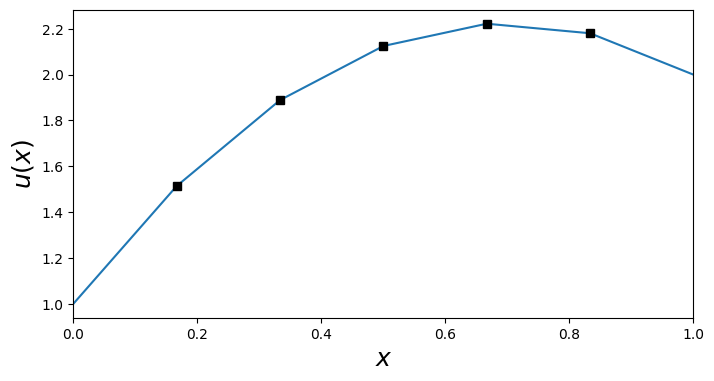

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, U)
ax.plot(X[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)


### Example two: Sparse Matrix
To solve this PDE problem with Python and the finite-element method, we start by defining variables for the number of interior points and the values along the four boundaries of the unit square:

In [18]:
N = 100

In [19]:
u0_t, u0_b = 5, -5

In [20]:
u0_l, u0_r = 3, -1

In [21]:
dx = 1.0 / (N+1)

Using the eye and kron functions from the scipy.sparse module, we construct the Matrix A.The result is a sparse matrix A that describes the finite- difference equation system for the two-dimensional PDE.

In [22]:
A_1d = (sp.eye(N, k=-1) + sp.eye(N, k=1) - 4 * sp.eye(N))/dx**2

In [23]:
A = sp.kron(sp.eye(N), A_1d) + (sp.eye(N**2, k=-N) + sp.eye(N**2,
k=N))/dx**2

In [24]:
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

To construct the vector b from the boundary conditions, it is convenient to create a N × N array of zeros and assign the boundary condition to edge elements of this array. <br>We can use the reshape method to rearrange it into a N2 × 1 vector that can be used in the Av = b equation



In [25]:
b = np.zeros((N, N))
b[0, :] += u0_b #bottom
b[-1, :] += u0_t #top
b[:, 0] += u0_l #left
b[:, -1] += u0_r #right

b = - b.reshape(N**2) / dx**2

SOLUTION

In [26]:
v = sp.linalg.spsolve(A, b)

In [27]:
u = v.reshape(N, N)

VISUALIZATION
<br> Colormap graph and a 3D surface view of the solution

In [28]:
U = np.vstack([np.ones((1, N+2)) * u0_b,
               np.hstack([np.ones((N, 1)) * u0_l, u, np.ones
                          ((N, 1)) * u0_r]), np.ones((1, N+2)) * u0_t])
x = np.linspace(0, 1, N+2)

<ipython-input-29-88fab4adb0b0>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('RdBu_r')


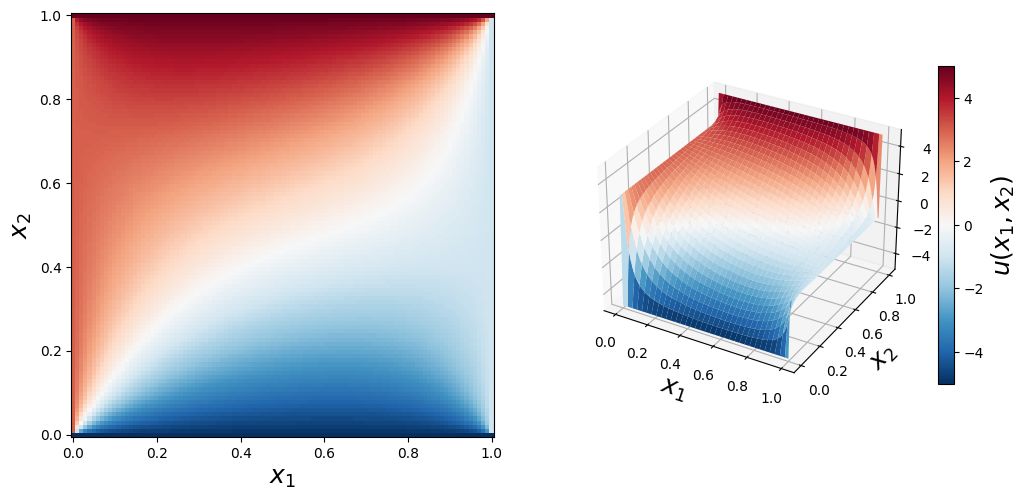

In [29]:
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(12, 5.5))
cmap = mpl.cm.get_cmap('RdBu_r')
ax = fig.add_subplot(1, 2, 1)
c = ax.pcolor(X, Y, U, vmin=-5, vmax=5, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, U, vmin=-5, vmax=5, rstride=3, cstride=3,
              linewidth=0, cmap=cmap)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
cb = plt.colorbar(p, ax=ax, shrink=0.75)
cb.set_label(r"$u(x_1, x_2)$", fontsize=18)

## Finite Element Methods FEMs
The finite-element method is a powerful and universal method for converting PDEs into algebraic equations. The basic idea of this method is to represent the domain on which the PDE is defined with a finite set of discrete regions, or elements, and to approximate the unknown function as a linear combination of basis functions with local support on each of these elements (or on a small group of neighboring elements).<br> Solving a PDE using FEM typically involves the following steps:
* Generate a mesh for the problem domain.
* Write the PDE on weak form.
* Program the problem in the FEM framework.
* Solve the resulting algebraic equations.
* Post-process and/or visualize the solution.

# FEM LIBRARIES
For Python there are at least three significant FEM packages:
* FiPy: Technically, the FiPy library is not a FEM software, but rather
a finite-volume method (FVM) software, but the gist of this method is quite similar to FEM.
* SfePy: The SfePy library is a FEM software that takes a slightly different approach to define PDE problems, in that it uses Python files as configuration files for its FEM solver, rather programmatically setting up a FEM problem (although this mode of operation
is technically also supported in SfePy).
* FEniCS: FEniCS, which is written for C++ and Python. It provides an elegant Python interface to a powerful FEM engine. Like FDM problem, FEM problems typically result in very large-scale equation systems that require using sparse matrix techniques to solve efficiently.


## Solving PDEs Using FEniCS


We will also use the FEniCS FEM framework, and we require that its dolfin and mshr libraries be imported in the following manner:

In [30]:
import dolfin
import mshr

ModuleNotFoundError: No module named 'dolfin'

In [33]:
# !pip install nbconvert
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc
# !pip install pypandoc



from google.colab import drive
drive.mount('/content/drive')
!cp "./drive/My Drive/Colab Notebooks/PDE.ipynb" ./


!jupyter nbconvert 'PDE.ipynb' --to pdf

from google.colab import files
files.download('PDE.pdf')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook PDE.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('errorDetails' was unexpected)

Failed validating 'additionalProperties' in error:

On instance['cells'][49]['outputs'][0]:
{'ename': 'ModuleNotFoundError',
 'errorDetails': {'actions': [{'action': 'open_url',
                               'actionText': 'Open Examples',
                               'url': '/notebooks/snippets/importing_libraries.ipynb'}]},
 'evalue': "No module named 'dolfin'",
 'output_type': 'error',
 'traceback': ['\x1b---------------------------------------------------------...',
               '\x1bModuleNotFoundError\x1b                       '
               'Traceback (...',
               '\x1b<ipython-input-30-b87d1ba1871e>\x1b in '
               '\x1b<cell line:...',
               '\x1bMod

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>